<a href="https://colab.research.google.com/github/WTongoing/Word_Frequency_Calculation_ntlk/blob/main/Word_frequency_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk import bigrams
import networkx as nx
import itertools
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# **Create multiple pre-define functions which can be called directly**

In [ ]:
#create a function to tokenize sentence,normalize word and compute word' frequency
def frequency_calculation(sentence):
  #get tokens, to lowercase, delete stopwords and non-alphabet
  tokens = word_tokenize(sentence)
  tokens = [t.lower() for t in tokens]
  tokens =[t for t in tokens if t not in stopwords.words("english")]
  tokens = [t for t in tokens if t.isalpha()]

  #word form reduction
  lemmatizer = WordNetLemmatizer()
  tokens =[lemmatizer.lemmatize(t) for t in tokens]

  count = Counter(tokens)
  return count

def dict_to_dataframe(dict):
  #transfer word，words_count and frequency dict to DataFrame
  word_frequency = pd.DataFrame.from_dict(dict,orient='index',columns=['frequency'])
  word_frequency = word_frequency.reset_index().rename({'index':'id'})
  word_frequency_df = word_frequency.sort_values(by='frequency',ascending=False)
  word_frequency_df.columns = ['word','frequency']
  word_count_sum = word_frequency_df['frequency'].sum()
  word_frequency_df['term_frequency'] = word_frequency_df['frequency']/word_count_sum

  return word_frequency_df

In [ ]:
#frequency_calculation function test
sentence = "@kabirakhtar Yeah, it’s terrible. Had to upgrade old Linux OS and a bunch of drivers first. Major browser upgrades coming to all cars in a few months. Note, will be slower at first until code is optimized."
frequency_calculation(sentence)

Counter({'kabirakhtar': 1,
         'yeah': 1,
         'terrible': 1,
         'upgrade': 2,
         'old': 1,
         'linux': 1,
         'o': 1,
         'bunch': 1,
         'driver': 1,
         'first': 2,
         'major': 1,
         'browser': 1,
         'coming': 1,
         'car': 1,
         'month': 1,
         'note': 1,
         'slower': 1,
         'code': 1,
         'optimized': 1})

In [ ]:
#import related csv and filter tweet content
df_2017 = pd.read_csv('2017.csv')
df_2017 = df_2017.loc[:,['tweet']]
df_2018 = pd.read_csv('2018.csv')
df_2018 = df_2018.loc[:,['tweet']]
df_2019 = pd.read_csv('2019.csv')
df_2019 = df_2019.loc[:,['tweet']]
df_2020 = pd.read_csv('2020.csv')
df_2020 = df_2020.loc[:,['tweet']]
df_2021 = pd.read_csv('2021.csv')
df_2021 = df_2021.loc[:,['tweet']]
df_2022 = pd.read_csv('2022.csv')
df_2022 = df_2022.loc[:,['tweet']]
df_2017

,tweet
0,@neilsiegel @Tesla Coming very soon
1,@Kreative Vastly better maps/nav coming soon
2,@dd_hogan Ok
3,@Jason @Tesla Sure
4,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."
...,...
3162,That was a total non sequitur btw
3163,"Great Voltaire quote, arguably better than Twa..."
3164,I made the volume on the Model S http://t.co/...
3165,Went to Iceland on Sat to ride bumper cars on ...


In [ ]:
#create a function to compute tweet_words_frequency
def tweet_frequency_calculation(dataframe):
  default = []
  test = dataframe[['tweet']].values.tolist()
  test = np.array(test).flatten()
  test = test.tolist()
  for sentence in test:
    default.append(sentence)
  concat_str = "".join(default)
  dict = frequency_calculation(concat_str)
  return dict

In [ ]:
#update dataframe including Rank
def create_dataframe_with_rank(df_word_freq):
  default_rank_list = []
  df_word_freq = df_word_freq.reset_index(drop=False).rename(columns = {'index':'id'})
  df_word_freq = df_word_freq.reset_index().rename(columns={'index':'rank'})

  rank_list = df_word_freq['rank'].tolist()
  for element in range(len(rank_list)):
    element += 1
    default_rank_list.append(element)

  #change the columns order
  df_word_freq['Rank'] = default_rank_list
  df_word_freq = df_word_freq.drop(labels='rank',axis=1)
  return df_word_freq

In [ ]:
#create function plotting rank versus frequency(log vs log)
def plotting_zipfLaw(year,dataframe):
  title = "Zipf-Law for {}".format(year)
  plt.title(title,fontsize=17)  
  plt.xlabel('Rank',fontsize=15)    
  plt.ylabel('Frequency',fontsize=15)     
  plt.yticks([pow(10,i) for i in range(0,4)])  
  plt.xticks([pow(10,i) for i in range(0,4)])  
  plt.yscale('log')          
  plt.xscale('log')          
  label = "{} words rank vs frequency".format(year)
  plt.plot(dataframe['Rank'],dataframe['frequency'],label=label)   
  plt.rcParams['figure.figsize'] = (9.0,7.0)
  plt.legend(fontsize=14)
  plt.show()

In [ ]:
#create a function to compute word-pair frequency
def bigram_frequency_calculation(sentence):
  #get tokens, to lowercase, delete stopwords and non-alphabet
  tokens = word_tokenize(sentence)
  tokens = [t.lower() for t in tokens]
  tokens =[t for t in tokens if t not in stopwords.words("english")]
  tokens = [t for t in tokens if t.isalpha()]

  #word pair count
  terms_bigram = list(bigrams(tokens))
  bigram_counts = Counter(terms_bigram)

  return bigram_counts

In [ ]:
#create a function to calculate tweet_wordpairs_frequency
#e.g:dataframe:df_2017/df_2018/df_2019...
def tweet_wordpairs_frequency_calculation(dataframe):
  default = []
  test = dataframe[['tweet']].values.tolist()
  test = np.array(test).flatten()
  test = test.tolist()
  for sentence in test:
    default.append(sentence)
  concat_str = "".join(default)
  dict = bigram_frequency_calculation(concat_str)
  return dict

In [ ]:
#function to create barcharts to visualize counts of word pairs by the highest 20 counts
def word_pair_count_barchart(year,df_word_pair_count):
  df_wordpair_count_20 = df_word_pair_count.iloc[0:20,:]
  df_wordpair_count_20 = df_wordpair_count_20.set_index('word pair')
  bigram_barchart_title = "Top 20 word-pairs in {}".format(year)
  df_wordpair_count_20.plot(kind='barh',title=bigram_barchart_title, sort_columns=True,fontsize=13,xlabel='word pair',figsize=(8,6))

# **1. for year 2017**

In [ ]:
#df_2017 word frequency dataframe
tweet_dict = tweet_frequency_calculation(df_2017)
df_2017_word_freq = dict_to_dataframe(tweet_dict)
df_2017_word_freq

,word,frequency,term_frequency
204,http,856,0.033294
1,tesla,252,0.009802
120,amp,219,0.008518
61,model,172,0.006690
22,car,166,0.006457
...,...,...,...
3472,chemisdrey,1,0.000039
3473,backlog,1,0.000039
3474,foldflat,1,0.000039
3475,fav,1,0.000039


**Show top 10 words (for 2017) by the highest value of word frequency:**

In [ ]:
df_2017_word_freq.head(10)

,word,frequency,term_frequency
204,http,856,0.033294
1,tesla,252,0.009802
120,amp,219,0.008518
61,model,172,0.006690
22,car,166,0.006457
70,good,150,0.005834
193,rocket,147,0.005718
41,like,140,0.005445
373,yes,112,0.004356
186,spacex,111,0.004317


**Plot histogram of word frequencies for year 2017:**

In [ ]:
#plot df_2017 word frequency histogram

fig = px.histogram(df_2017_word_freq,
                  x = df_2017_word_freq['word'],
                  y = df_2017_word_freq['frequency'],
                  title = '2017 words frequency histogram')
fig.show()

**Use Zipf’s law and plot log-log plots of word frequencies and rank for year 2017:**

In [ ]:
#update dataframe including Rank
create_dataframe_with_rank(df_2017_word_freq)

,id,word,frequency,term_frequency,Rank
0,204,http,856,0.033294,1
1,1,tesla,252,0.009802,2
2,120,amp,219,0.008518,3
3,61,model,172,0.006690,4
4,22,car,166,0.006457,5
...,...,...,...,...,...
6545,3472,chemisdrey,1,0.000039,6546
6546,3473,backlog,1,0.000039,6547
6547,3474,foldflat,1,0.000039,6548
6548,3475,fav,1,0.000039,6549


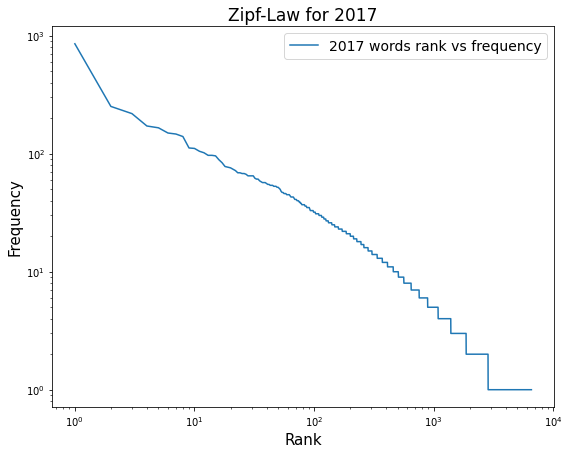

In [ ]:
#plotting rank versus frequency(log vs log)
plotting_zipfLaw(year='2017',dataframe=create_dataframe_with_rank(df_2017_word_freq))

**show top 20 word-pair(for 2017) by the highest value of word-pair frequencies by Barchart:**

In [ ]:
#2017 tweet_wordpairs_frequency_calculation 
dict_wordpair_count = tweet_wordpairs_frequency_calculation(df_2017)
df_wordpair_count = pd.DataFrame.from_dict(dict_wordpair_count,orient='index',columns=['counts'])
df_wordpair_count = df_wordpair_count.reset_index().rename(columns={'index':'word pair'})
df_wordpair_count = df_wordpair_count.sort_values(by=['counts'],ascending=False)
df_wordpair_count

,word pair,counts
2,"(coming, soon)",27
2479,"(model, x)",26
3012,"(space, station)",23
3214,"(cape, canaveral)",20
1924,"(upper, stage)",19
...,...,...
8212,"(camera, calibration)",1
8211,"(complete, camera)",1
8210,"(wo, complete)",1
8209,"(car, wo)",1


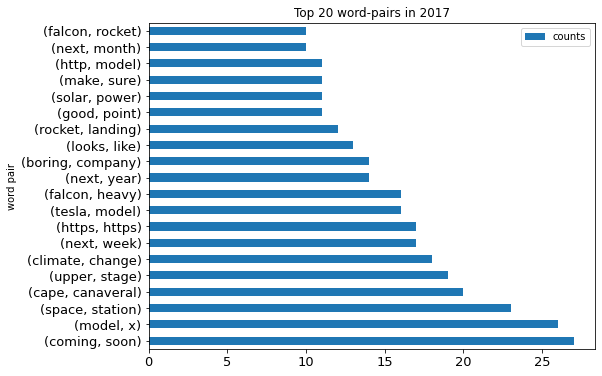

In [ ]:
word_pair_count_barchart(year='2017',df_word_pair_count=df_wordpair_count)

**Create bigram network graphs for 2017:**

In [ ]:
!pip install scipy==1.8.0

In [ ]:
!pip install networkx==2.7.0
!pip install draw_networkx==2.7

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 36870 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 36578 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 12398 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 27861 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 21063 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 36870 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 36578 missing from current font.

/usr/local/lib/python3.8/dist-packages/matplotli

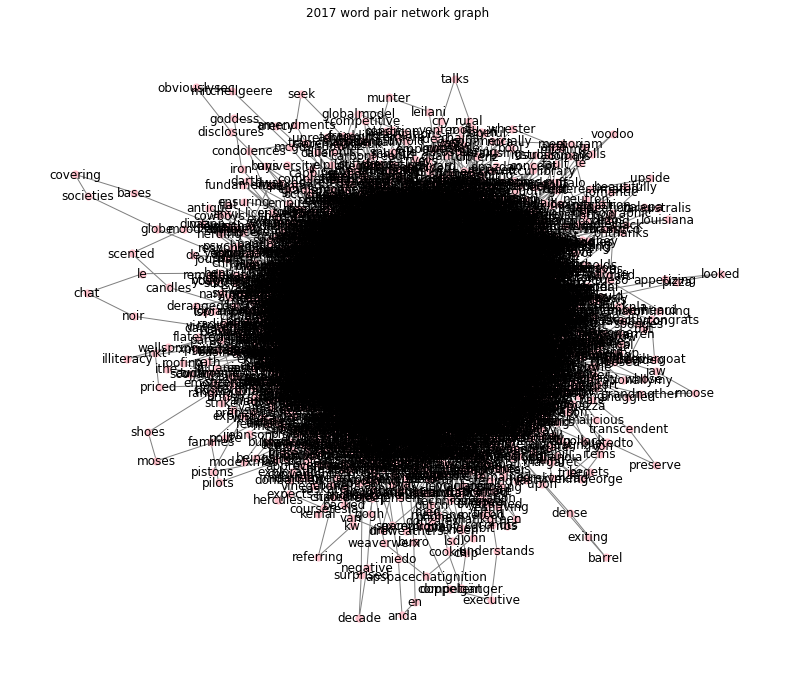

In [ ]:
#plotting network by networkx package
df_wordpair_count_T = df_wordpair_count.set_index('word pair').T.to_dict('records')
df_wordpair_count_T
G = nx.Graph()

# Create connections between nodes
for k, v in df_wordpair_count_T[0].items():
  G.add_edge(k[0],k[1],weight=(v*5))

fig, ax = plt.subplots(figsize=(12,10))

# Plot networks
nx.draw(G,nx.spring_layout(G),
                 node_size = 200,
                 font_size = 12,
                 edge_color='grey',
                 node_color='pink',
                 node_shape='.',
                 with_labels = True,
                 ax=ax)
plt.title('2017 word pair network graph')
plt.show()

# **2.For year 2018:**

In [ ]:
#df_2018 word frequency dataframe
tweet_dict = tweet_frequency_calculation(df_2018)
df_2018_word_freq = dict_to_dataframe(tweet_dict)
df_2018_word_freq

,word,frequency,term_frequency
19,amp,527,0.025190
1,tesla,427,0.020410
23,http,323,0.015439
127,car,171,0.008174
199,good,97,0.004636
...,...,...,...
2939,flyfiddlesticks,1,0.000048
2940,patrickc,1,0.000048
2941,stevesi,1,0.000048
2942,globally,1,0.000048


**Show top 10 words (for 2018) by the highest value of word frequency:**

In [ ]:
df_2018_word_freq.head(10)

,word,frequency,term_frequency
19,amp,527,0.025190
1,tesla,427,0.020410
23,http,323,0.015439
127,car,171,0.008174
199,good,97,0.004636
147,model,96,0.004589
115,like,95,0.004541
32,yes,89,0.004254
279,spacex,84,0.004015
76,year,81,0.003872


**Plot histogram of word frequencies for year 2018:**

In [ ]:
#plot df_2018 word frequency histogram
fig = px.histogram(df_2018_word_freq,
                  x = df_2018_word_freq['word'],
                  y = df_2018_word_freq['frequency'],
                  title = '2018 words frequency histogram')
fig.show()

**Use Zipf’s law and plot log-log plots of word frequencies and rank for year 2018:**

In [ ]:
#update dataframe including Rank
create_dataframe_with_rank(df_2018_word_freq)

,id,word,frequency,term_frequency,Rank
0,19,amp,527,0.025190,1
1,1,tesla,427,0.020410,2
2,23,http,323,0.015439,3
3,127,car,171,0.008174,4
4,199,good,97,0.004636,5
...,...,...,...,...,...
5722,2939,flyfiddlesticks,1,0.000048,5723
5723,2940,patrickc,1,0.000048,5724
5724,2941,stevesi,1,0.000048,5725
5725,2942,globally,1,0.000048,5726


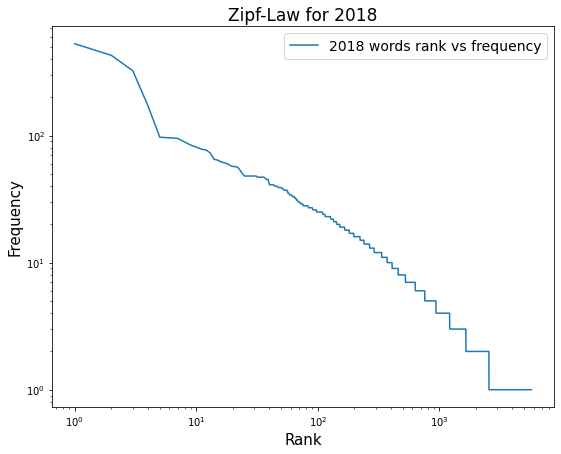

In [ ]:
#plotting rank versus frequency(log vs log)
plotting_zipfLaw(year='2018',dataframe=create_dataframe_with_rank(df_2018_word_freq))

**show top 20 word-pair(for 2018) by the highest value of word-pair frequencies by Barchart:**

In [ ]:
#2018 tweet_wordpairs_frequency_calculation 
dict_wordpair_count_2018 = tweet_wordpairs_frequency_calculation(df_2018)
df_wordpair_count_2018 = pd.DataFrame.from_dict(dict_wordpair_count_2018,orient='index',columns=['counts'])
df_wordpair_count_2018 = df_wordpair_count_2018.reset_index().rename(columns={'index':'word pair'})
df_wordpair_count_2018 = df_wordpair_count_2018.sort_values(by=['counts'],ascending=False)
df_wordpair_count_2018

,word pair,counts
91,"(next, year)",23
68,"(coming, soon)",21
4200,"(electrekco, fredericlambert)",20
689,"(https, https)",18
440,"(jeromejaccard, robotbeat)",17
...,...,...
6686,"(work, openai)",1
6687,"(openai, need)",1
6688,"(need, neural)",1
6689,"(neural, interface)",1


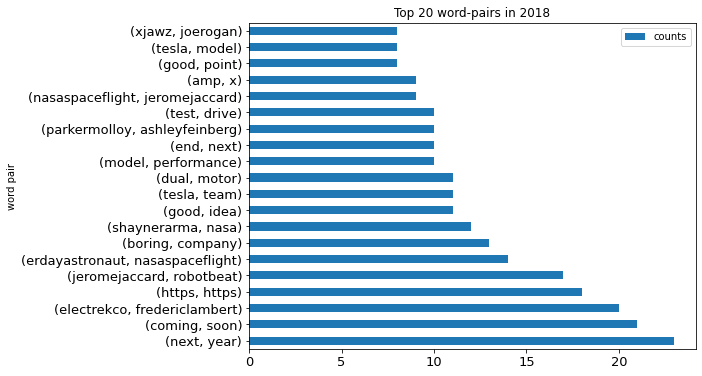

In [ ]:
word_pair_count_barchart(year='2018',df_word_pair_count=df_wordpair_count_2018)

# **3.For year 2019:**

In [ ]:
#df_2019 word frequency dataframe
tweet_dict = tweet_frequency_calculation(df_2019)
df_2019_word_freq = dict_to_dataframe(tweet_dict)
df_2019_word_freq

,word,frequency,term_frequency
177,http,1550,0.022769
8,amp,1218,0.017892
199,tesla,1213,0.017819
224,car,469,0.006889
167,spacex,404,0.005935
...,...,...,...
6349,chubbies,1,0.000015
6347,sz,1,0.000015
6346,hqr,1,0.000015
6344,sockbootswhat,1,0.000015


**Show top 10 words (for 2019) by the highest value of word frequency:**

In [ ]:
df_2019_word_freq.head(10)

,word,frequency,term_frequency
177,http,1550,0.022769
8,amp,1218,0.017892
199,tesla,1213,0.017819
224,car,469,0.006889
167,spacex,404,0.005935
105,yes,333,0.004892
39,good,330,0.004848
709,model,325,0.004774
504,like,318,0.004671
107,erdayastronaut,300,0.004407


**Plot histogram of word frequencies for year 2019:**

In [ ]:
#plot df_2019 word frequency histogram
fig = px.histogram(df_2019_word_freq,
                  x = df_2019_word_freq['word'],
                  y = df_2019_word_freq['frequency'],
                  title = '2019 words frequency histogram')
fig.show()

**Use Zipf’s law and plot log-log plots of word frequencies and rank for year 2019:**

In [ ]:
#update dataframe including Rank
create_dataframe_with_rank(df_2019_word_freq)

,id,word,frequency,term_frequency,Rank
0,177,http,1550,0.022769,1
1,8,amp,1218,0.017892,2
2,199,tesla,1213,0.017819,3
3,224,car,469,0.006889,4
4,167,spacex,404,0.005935,5
...,...,...,...,...,...
11751,6349,chubbies,1,0.000015,11752
11752,6347,sz,1,0.000015,11753
11753,6346,hqr,1,0.000015,11754
11754,6344,sockbootswhat,1,0.000015,11755


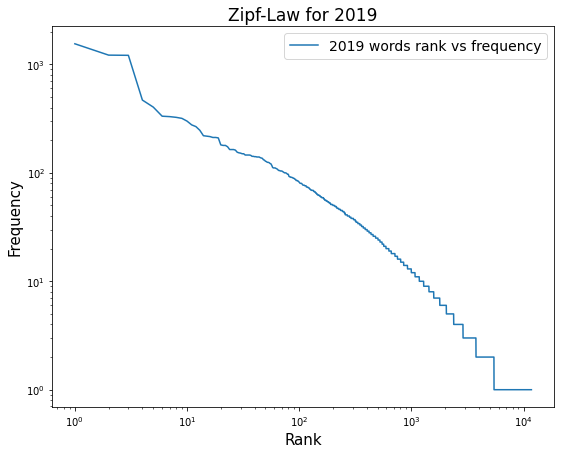

In [ ]:
#plotting rank versus frequency(log vs log)
plotting_zipfLaw(year='2019',dataframe=create_dataframe_with_rank(df_2019_word_freq))

**show top 20 word-pair(for 2019) by the highest value of word-pair frequencies by Barchart:**

In [ ]:
#2019 tweet_wordpairs_frequency_calculation 
dict_wordpair_count_2019 = tweet_wordpairs_frequency_calculation(df_2019)
df_wordpair_count_2019 = pd.DataFrame.from_dict(dict_wordpair_count_2019,orient='index',columns=['counts'])
df_wordpair_count_2019 = df_wordpair_count_2019.reset_index().rename(columns={'index':'word pair'})
df_wordpair_count_2019 = df_wordpair_count_2019.sort_values(by=['counts'],ascending=False)
df_wordpair_count_2019

,word pair,counts
455,"(coming, soon)",66
904,"(https, https)",49
1608,"(next, year)",46
1873,"(erdayastronaut, spacex)",38
1529,"(next, week)",37
...,...,...
21130,"(amp, secured)",1
21131,"(secured, contracts)",1
21132,"(contracts, major)",1
21133,"(major, haulers)",1


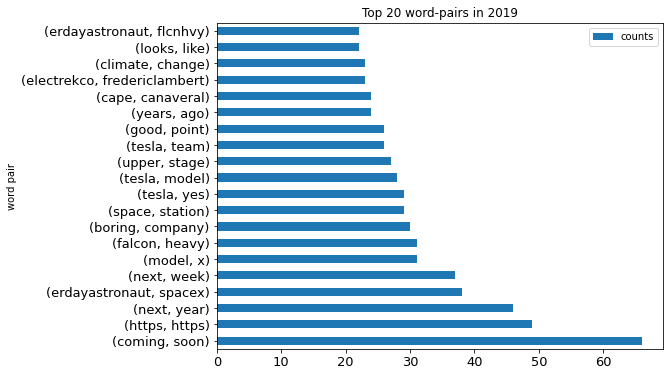

In [ ]:
word_pair_count_barchart(year='2019',df_word_pair_count=df_wordpair_count_2019)

# **4.For year 2020:**

In [ ]:
#df_2020 word frequency dataframe
tweet_dict = tweet_frequency_calculation(df_2020)
df_2020_word_freq = dict_to_dataframe(tweet_dict)
df_2020_word_freq

,word,frequency,term_frequency
187,http,1913,0.020223
37,amp,1822,0.019261
12,tesla,1564,0.016534
357,spacex,609,0.006438
134,erdayastronaut,561,0.005931
...,...,...,...
7984,pointleasing,1,0.000011
7983,movingux,1,0.000011
1261,identify,1,0.000011
7980,dirtnapdragon,1,0.000011


**Show top 10 words (for 2020) by the highest value of word frequency:**

In [ ]:
df_2020_word_freq.head(10)

,word,frequency,term_frequency
187,http,1913,0.020223
37,amp,1822,0.019261
12,tesla,1564,0.016534
357,spacex,609,0.006438
134,erdayastronaut,561,0.005931
2,car,537,0.005677
77,yes,480,0.005074
51,good,440,0.004651
96,flcnhvy,424,0.004482
75,like,397,0.004197


**Plot histogram of word frequencies for year 2020:**

In [ ]:
#plot df_2020 word frequency histogram
fig = px.histogram(df_2020_word_freq,
                  x = df_2020_word_freq['word'],
                  y = df_2020_word_freq['frequency'],
                  title = '2020 words frequency histogram')
fig.show()

**Use Zipf’s law and plot log-log plots of word frequencies and rank for year 2020:**

In [ ]:
#update dataframe including Rank
create_dataframe_with_rank(df_2020_word_freq)

,id,word,frequency,term_frequency,Rank
0,187,http,1913,0.020223,1
1,37,amp,1822,0.019261,2
2,12,tesla,1564,0.016534,3
3,357,spacex,609,0.006438,4
4,134,erdayastronaut,561,0.005931,5
...,...,...,...,...,...
14102,7984,pointleasing,1,0.000011,14103
14103,7983,movingux,1,0.000011,14104
14104,1261,identify,1,0.000011,14105
14105,7980,dirtnapdragon,1,0.000011,14106


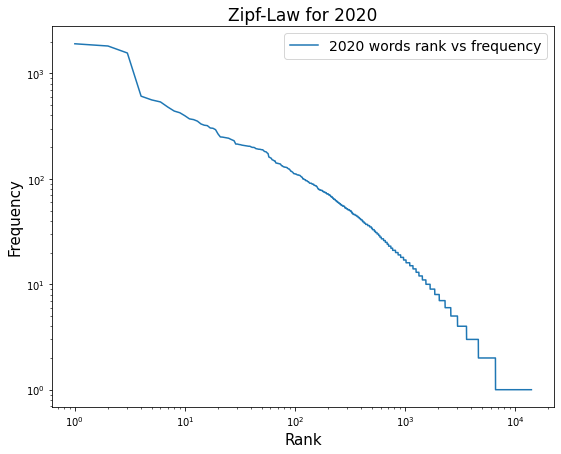

In [ ]:
#plotting rank versus frequency(log vs log)
plotting_zipfLaw(year='2020',dataframe=create_dataframe_with_rank(df_2020_word_freq))

**show top 20 word-pair(for 2020) by the highest value of word-pair frequencies by Barchart:**

In [ ]:
#2020 tweet_wordpairs_frequency_calculation 
dict_wordpair_count_2020 = tweet_wordpairs_frequency_calculation(df_2020)
df_wordpair_count_2020 = pd.DataFrame.from_dict(dict_wordpair_count_2020,orient='index',columns=['counts'])
df_wordpair_count_2020 = df_wordpair_count_2020.reset_index().rename(columns={'index':'word pair'})
df_wordpair_count_2020 = df_wordpair_count_2020.sort_values(by=['counts'],ascending=False)
df_wordpair_count_2020

,word pair,counts
34,"(coming, soon)",79
716,"(https, https)",68
3104,"(next, year)",51
765,"(erdayastronaut, spacex)",50
418,"(pretty, much)",47
...,...,...
28710,"(internet, tesla)",1
28712,"(ago, eljaboom)",1
28713,"(eljaboom, november)",1
28714,"(november, likely)",1


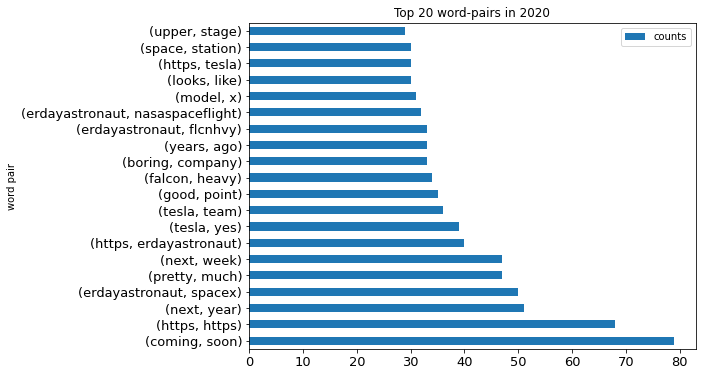

In [ ]:
word_pair_count_barchart(year='2020',df_word_pair_count=df_wordpair_count_2020)

# **5.For year 2021:**

In [ ]:
#df_2021 word frequency dataframe
tweet_dict = tweet_frequency_calculation(df_2021)
df_2021_word_freq = dict_to_dataframe(tweet_dict)
df_2021_word_freq

,word,frequency,term_frequency
40,amp,476,0.020973
30,http,320,0.014099
55,tesla,317,0.013967
318,spacex,235,0.010354
136,wholemarsblog,189,0.008327
...,...,...,...
2904,lax,1,0.000044
2905,nopeour,1,0.000044
2907,application,1,0.000044
2908,optimoprincipi,1,0.000044


**Show top 10 words (for 2021) by the highest value of word frequency:**

In [ ]:
df_2021_word_freq.head(10)

,word,frequency,term_frequency
40,amp,476,0.020973
30,http,320,0.014099
55,tesla,317,0.013967
318,spacex,235,0.010354
136,wholemarsblog,189,0.008327
383,teslaownerssv,119,0.005243
31,ppathole,116,0.005111
321,erdayastronaut,111,0.004891
207,car,103,0.004538
72,great,101,0.004450


**Plot histogram of word frequencies for year 2021:**

In [ ]:
#plot df_2021 word frequency histogram
fig = px.histogram(df_2021_word_freq,
                  x = df_2021_word_freq['word'],
                  y = df_2021_word_freq['frequency'],
                  title = '2021 words frequency histogram')
fig.show()

**Use Zipf’s law and plot log-log plots of word frequencies and rank for year 2021:**

In [ ]:
#update dataframe including Rank
create_dataframe_with_rank(df_2021_word_freq)

,id,word,frequency,term_frequency,Rank
0,40,amp,476,0.020973,1
1,30,http,320,0.014099,2
2,55,tesla,317,0.013967,3
3,318,spacex,235,0.010354,4
4,136,wholemarsblog,189,0.008327,5
...,...,...,...,...,...
5337,2904,lax,1,0.000044,5338
5338,2905,nopeour,1,0.000044,5339
5339,2907,application,1,0.000044,5340
5340,2908,optimoprincipi,1,0.000044,5341


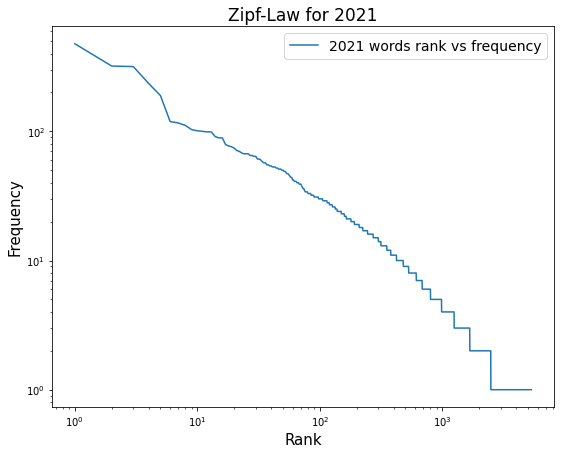

In [ ]:
#plotting rank versus frequency(log vs log)
plotting_zipfLaw(year='2021',dataframe=create_dataframe_with_rank(df_2021_word_freq))

**show top 20 word-pair(for 2021) by the highest value of word-pair frequencies by Barchart:**

In [ ]:
#2020 tweet_wordpairs_frequency_calculation 
dict_wordpair_count_2021 = tweet_wordpairs_frequency_calculation(df_2021)
df_wordpair_count_2021 = pd.DataFrame.from_dict(dict_wordpair_count_2021,orient='index',columns=['counts'])
df_wordpair_count_2021 = df_wordpair_count_2021.reset_index().rename(columns={'index':'word pair'})
df_wordpair_count_2021 = df_wordpair_count_2021.sort_values(by=['counts'],ascending=False)
df_wordpair_count_2021

,word pair,counts
8525,"(erdayastronaut, spacex)",24
33,"(https, https)",19
1843,"(teslarati, residentsponge)",18
447,"(ppathole, spacex)",18
2124,"(fsd, beta)",18
...,...,...
7168,"(teslaratiteam, new)",1
7167,"(ftw, teslaratiteam)",1
7166,"(norway, ftw)",1
7165,"(kristennetten, norway)",1


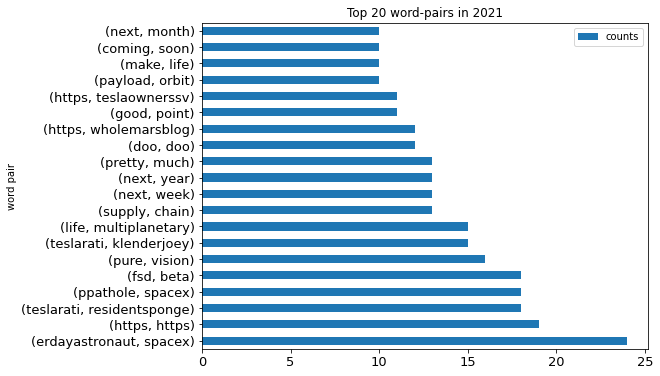

In [ ]:
word_pair_count_barchart(year='2021',df_word_pair_count=df_wordpair_count_2021)

# **6.For year 2022:**

In [ ]:
#df_2022 word frequency dataframe
tweet_dict = tweet_frequency_calculation(df_2022)
df_2022_word_freq = dict_to_dataframe(tweet_dict)
df_2022_word_freq

,word,frequency,term_frequency
185,http,118,0.01888
67,tesla,100,0.01600
275,wholemarsblog,84,0.01344
46,amp,80,0.01280
160,spacex,54,0.00864
...,...,...,...
745,within,2,0.00032
746,gulfstreams,2,0.00032
747,debug,2,0.00032
748,deployment,2,0.00032


**Show top 10 words (for 2022) by the highest value of word frequency:**

In [ ]:
df_2022_word_freq.head(10)

,word,frequency,term_frequency
185,http,118,0.01888
67,tesla,100,0.01600
275,wholemarsblog,84,0.01344
46,amp,80,0.01280
160,spacex,54,0.00864
5,teslaownerssv,50,0.00800
172,car,42,0.00672
681,sawyermerritt,36,0.00576
59,people,34,0.00544
64,would,32,0.00512


**Plot histogram of word frequencies for year 2022:**

In [ ]:
#plot df_2021 word frequency histogram
fig = px.histogram(df_2022_word_freq,
                  x = df_2022_word_freq['word'],
                  y = df_2022_word_freq['frequency'],
                  title = '2022 words frequency histogram')
fig.show()

**Use Zipf’s law and plot log-log plots of word frequencies and rank for year 2022:**

In [ ]:
#update dataframe including Rank
create_dataframe_with_rank(df_2022_word_freq)

,id,word,frequency,term_frequency,Rank
0,185,http,118,0.01888,1
1,67,tesla,100,0.01600,2
2,275,wholemarsblog,84,0.01344,3
3,46,amp,80,0.01280,4
4,160,spacex,54,0.00864,5
...,...,...,...,...,...
1560,745,within,2,0.00032,1561
1561,746,gulfstreams,2,0.00032,1562
1562,747,debug,2,0.00032,1563
1563,748,deployment,2,0.00032,1564


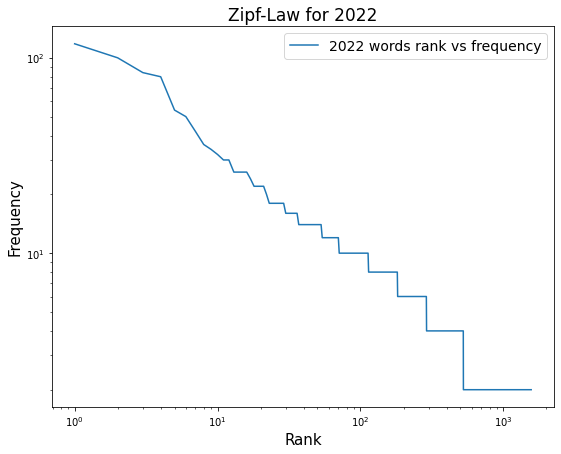

In [ ]:
#plotting rank versus frequency(log vs log)
plotting_zipfLaw(year='2022',dataframe=create_dataframe_with_rank(df_2022_word_freq))

**show top 20 word-pair(for 2022) by the highest value of word-pair frequencies by Barchart:**

In [ ]:
#2020 tweet_wordpairs_frequency_calculation 
dict_wordpair_count_2022 = tweet_wordpairs_frequency_calculation(df_2022)
df_wordpair_count_2022 = pd.DataFrame.from_dict(dict_wordpair_count_2022,orient='index',columns=['counts'])
df_wordpair_count_2022 = df_wordpair_count_2022.reset_index().rename(columns={'index':'word pair'})
df_wordpair_count_2022 = df_wordpair_count_2022.sort_values(by=['counts'],ascending=False)
df_wordpair_count_2022

,word pair,counts
1477,"(https, https)",14
173,"(teslarati, residentsponge)",10
1120,"(madonnainn, telsa)",8
1121,"(telsa, sjvtesla)",8
1122,"(sjvtesla, teslaclubsocal)",8
...,...,...
1008,"(one, martiandoge)",2
1009,"(martiandoge, steveofrivia)",2
1011,"(sawyermerritt, would)",2
1012,"(would, great)",2


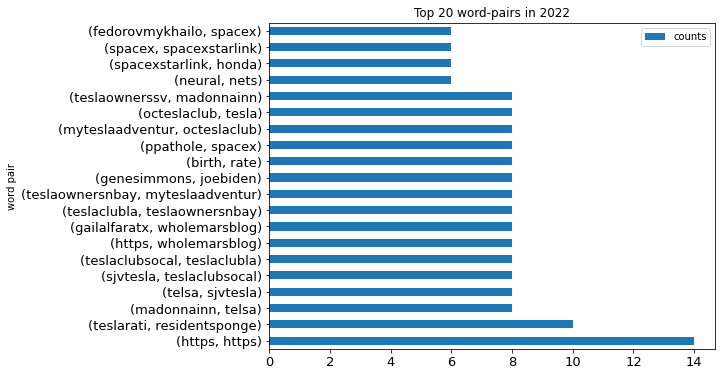

In [ ]:
word_pair_count_barchart(year='2022',df_word_pair_count=df_wordpair_count_2022)

**Create bigram network graphs for 2022:**

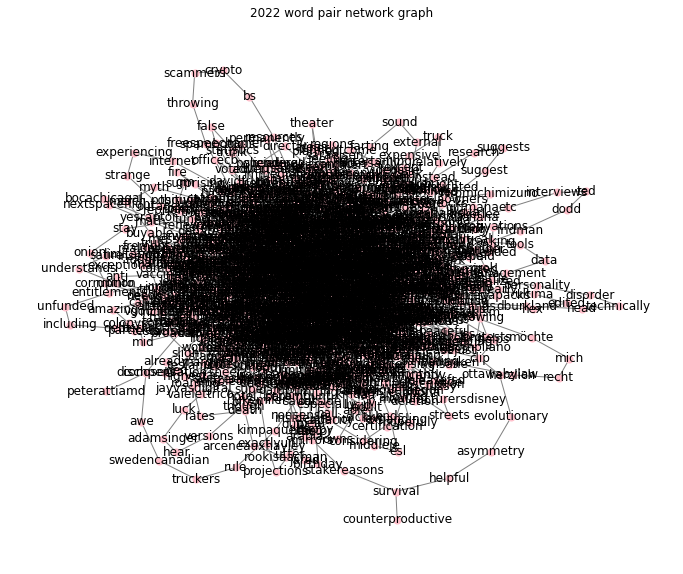

In [ ]:
#plotting network by networkx package
df_wordpair_count_T_2022 = df_wordpair_count_2022.set_index('word pair').T.to_dict('records')
df_wordpair_count_T_2022
G = nx.Graph()

# Create connections between nodes
for k, v in df_wordpair_count_T_2022[0].items():
  G.add_edge(k[0],k[1],weight=(v*5))

fig, ax = plt.subplots(figsize=(12,10))

# Plot networks
nx.draw(G,nx.spring_layout(G),
                   node_size = 200,
                   font_size = 12,
                   edge_color='grey',
                   node_color='pink',
                   node_shape='.',
                   with_labels = True,
                   ax=ax)
plt.title('2022 word pair network graph')
plt.show()

# save all as HTML

In [ ]:
!jupyter nbconvert --to html IE5374_project2_task2.ipynb